

# Semana 12: Pandas 1

  









[Juego emparejados numpy y matplotlib](https://interacty.me/projects/6e75a213e0be0d1f)



## 12.1. Definición

Python Data Analysis Library.

Pandas es una de las librerías de Python más populares en ciencia de datos. Proporciona estructuras de datos de alto nivel y funciones que están diseñadas para que el trabajo con datos estructurados o tabulares sea rápido y fácil. En particular, Pandas proporciona funcionalidades que facilitan la indexación, segmentación, el uso de agregaciones y mucho más. Dado que la manipulación y limpieza de datos son habilidades importantes en la ciencia de datos, esta será una herramienta imprescindible.

Pandas está construida sobre Numpy, por lo que podemos usar los métodos y funcionalidades de los arreglos de numpy que estudiamos en las sesiones anteriores. Además, los objetos de pandas van a ser las estructuras de datos con las cuales vamos a alimentar los algoritmos de Machine Learning, por lo que va a ser fundamental tener un buen conocimiento de estos objetos.



In [ ]:
# importaciones
import numpy as np
import pandas as pd


## 12.2. Series de pandas

Una serie de pandas es un arreglo unidimensional de datos indexados



![](https://i.imgur.com/lYSmUIx.png)

Podemos crear una serie a partir de una lista o arreglo mediante el constructor `Series`

In [ ]:
# datos unidimensionales
lista = [3, -1, 7, 6, 22]

# indices
indices = ["a", "Fabio", 2, "Mariana", "E"]

# creacion de la serie
serie = pd.Series(data=lista, index=indices, dtype="int8")
serie

a           3
Fabio      -1
2           7
Mariana     6
E          22
dtype: int8

Podemos acceder al tipo de dato, valores e índices de la serie con los atributos `dtype`, `values` e `index`, respectivamente



In [ ]:
# tipo de dato en la serie
serie.dtype

dtype('int8')

In [ ]:
# valores de la serie
serie.values

array([ 3, -1,  7,  6, 22], dtype=int8)

In [ ]:
# indices de la serie
serie.index

Index(['a', 'Fabio', 2, 'Mariana', 'E'], dtype='object')


## 12.3. Dataframe de pandas

La siguiente estructura fundamental en Pandas es el *Dataframe*. Si una serie es un análogo de un arreglo unidimensional con índices flexibles, un *DataFrame* es un análogo de un arreglo bidimensional con índices de fila y columna flexibles


In [ ]:
s = np.array([[1, 2, 3],[4,5,6]])
s[0,2]

3

![](https://i.imgur.com/1s3PPpq.png)

Podemos construir un dataframe con el constructor `DataFrame`

In [ ]:
# Construir un DataFrame a partir de un diccionario

#Declarando el diccionario de nombre "data"
data = {
    "Pais": ["Suiza", "Australia", "Canada"],
    "Capital": ["Berna", "Canberra", "Ottawa"],
    "Pob": [8.6, 25.7, 38]
}

indices = ["A", "B","C"]

#Creando el DataFrame, al que estoy nombrando como "tabla"
tabla = pd.DataFrame(data = data, index= indices)
tabla

,Pais,Capital,Pob
A,Suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0


In [ ]:
#Crear DataFrame con un arreglo en dos dimensiones

# arreglo bidimensional 3x3
data = [["Suiza", "Berna", 8.6],
        ["Australia", "Canberra", 25.7],
        ["Canada", "Ottawa", 38]]

# indices de columna
columnas = ["Pais", "Capital", "Pob"]

#indices filas
indices = ["A", "B","C"]

In [ ]:
df = pd.DataFrame(data=data, columns=columnas, index=indices)
df

,Pais,Capital,Poblacion
A,Suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0


In [ ]:
# indices de fila
indices = ["PAIS A", "PAIS B", "PAIS C"]

In [ ]:
# creacion del DataFrame
df = pd.DataFrame(data=data, index=indices, columns=columnas)
df

,Pais,Capital,Pob
PAIS A,Suiza,Berna,8.6
PAIS B,Australia,Canberra,25.7
PAIS C,Canada,Ottawa,38.0


Al igual que con la serie, podemos acceder a cada uno de los elementos que componen el DataFrame. En este caso, tenemos un objeto tipo `index` tanto para las filas como para las columnas

In [ ]:
# tipos de dato
df.dtypes

Pais        object
Capital     object
Pob        float64
dtype: object

In [ ]:
# valores
df.values

array([['Suiza', 'Berna', 8.6],
       ['Australia', 'Canberra', 25.7],
       ['Canada', 'Ottawa', 38.0]], dtype=object)

In [ ]:
# indices de fila
df.index

Index(['PAIS A', 'PAIS B', 'PAIS C'], dtype='object')

In [ ]:
# indices de columnas
df.columns

Index(['Pais', 'Capital', 'Pob'], dtype='object')

### 12.3.1. Índices**

Si no especificamos los indices de fila o columna, Pandas los asigna los de forma automática. Podemos redefinirlos de dos formas:

Modificando directamente los atributos `index` y `columns`



In [ ]:
df

,Pais,Capital,Pob
PAIS A,Suiza,Berna,8.6
PAIS B,Australia,Canberra,25.7
PAIS C,Canada,Ottawa,38.0


In [ ]:
# modificando los indices
df.index = ["a", "b", "c"]
df

,Pais,Capital,Pob
a,Suiza,Berna,8.6
b,Australia,Canberra,25.7
c,Canada,Ottawa,38.0


In [ ]:
# modificando las columnas
df.columns = ["pais", "capital", "poblacion"]
df

,pais,capital,poblacion
a,Suiza,Berna,8.6
b,Australia,Canberra,25.7
c,Canada,Ottawa,38.0


o mediante el método `set_axis`, indicando con el kwarg `axis` el eje a utilizar

In [ ]:
# modificando los indices (axis 0)
df = df.set_axis(labels=["A", "B", "C"], axis=0)
df

,A,B,C
A,Suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0


In [ ]:
# modificando las columnas (axis 1)
df = df.set_axis(labels=["Pais", "Capital", "Poblacion"], axis=1)
df

,Pais,Capital,Poblacion
A,Suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0


Podemos modificar un índice de fila o columna individualmente mediante el método `rename`, indicando las columnas e indices que queremos modificar mediante un mapeo:

In [ ]:
# modificar el nombre de una columna
df.rename(columns={"Pais": "pais"})

,pais,Capital,Poblacion
A,Suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0


In [ ]:
# modificar el nombre de una fila
df.rename(index={"A": "a"})

,Pais,Capital,Poblacion
a,Suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0


El método `reset_index` nos devuelve a la configuración inicial de índices por defecto

In [ ]:
df

,Pais,Capital,Poblacion
A,Suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0


In [ ]:
# reinicializando los indices
df.reset_index()

,index,Pais,Capital,Poblacion
0,A,Suiza,Berna,8.6
1,B,Australia,Canberra,25.7
2,C,Canada,Ottawa,38.0


In [ ]:
df.reset_index(drop=True)

,Pais,Capital,Poblacion
0,Suiza,Berna,8.6
1,Australia,Canberra,25.7
2,Canada,Ottawa,38.0


### 12.3.2. Valores

Con el método `replace` podemos modificar los valores del DataFrame, de foma individual, o múltiples elementos mediante un mapeo:

In [ ]:
df

,Pais,Capital,Poblacion
A,Suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0


In [ ]:
# modificando un valor individual
df.replace("Suiza", "suiza")

,Pais,Capital,Poblacion
A,suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0


In [ ]:
# modificando multiples valores
df.replace({"Suiza": "suiza", 38.0: 38.5, 8.6:8.67})

,Pais,Capital,Poblacion
A,suiza,Berna,8.67
B,Australia,Canberra,25.70
C,Canada,Ottawa,38.50


Con `sort_values` podemos ordenar valores en un DataFrame, indicando la columna que queremos ordenar mediante el kwarg `by`

In [ ]:
df

,Pais,Capital,Poblacion
A,Suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0


In [ ]:
# ordenando ascendentemente por nombre de columna
df.sort_values(by="Poblacion")

,Pais,Capital,Poblacion
A,Suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0


In [ ]:
df.sort_values(by="Pais")

,Pais,Capital,Poblacion
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0
A,Suiza,Berna,8.6


In [ ]:
df

,Pais,Capital,Poblacion
A,Suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0
D,Suiza,Berna,50.0


In [ ]:
df.sort_values(by="Poblacion", ascending=False)

,Pais,Capital,Poblacion
C,Canada,Ottawa,38.0
B,Australia,Canberra,25.7
A,Suiza,Berna,8.6


In [ ]:
df.sort_values(by=["Pais", "Poblacion"], ascending=False)

,Pais,Capital,Poblacion
A,Suiza,Berna,8.6
C,Canada,Ottawa,38.0
B,Australia,Canberra,25.7


In [ ]:
df

,Pais,Capital,Poblacion
A,Suiza,Berna,8.6
B,Australia,Canberra,25.7
C,Canada,Ottawa,38.0


## 12.4. Cargando conjuntos de datos

La mayoría de las veces trabajaremos con datos existentes que necesitaremos cargar a un DataFrame. La función que debemos utilizar para esta tarea dependerá del formato en el que se ha generado el conjunto de datos.

El formato más común es el CSV, para el cual pandas nos proporciona la funcion `read_csv`.


In [ ]:
# direccion del .csv
fname = "/content/stars.csv"

# cargar el conjunto de datos a un dataframe
df = pd.read_csv(fname)
df

,ID,AR [hms],DEC [dms],mu-ra*cos(dec) [mas/yr],mu-dec [mas/yr],plx [mas],radvel [km/s]
0,* tau Cyg,21 14 47.493,+38 02 43.144,196.990,410.280,49.1600,-20.900
1,* sig Cyg,21 17 24.952,+39 23 40.853,-0.130,-3.580,1.1300,-5.300
2,* 6 Lac,22 30 29.26,+43 07 24.156,-1.980,-5.360,1.9000,-8.700
3,* 11 Lac,22 40 30.859,+44 16 34.704,93.830,10.710,9.8000,-11.530
4,* psi And,23 46 2.047,+46 25 12.986,8.446,-7.143,1.6352,-23.163
...,...,...,...,...,...,...,...
1592,* 32 Eri A,03 54 17.502,-02 57 17.04,26.330,0.079,9.4562,26.300
1593,* del Ser A,15 34 48.145,+10 32 19.88,-73.952,5.748,10.8056,-20.820
1594,* phi Per,01 43 39.638,+50 41 19.433,24.590,-14.010,4.5400,0.800
1595,* alf Eri,01 37 42.845,-57 14 12.31,87.000,-38.240,23.3900,18.600


Podemos definir cuál columna utilizar como índice mediante el kwarg `index_col`

In [ ]:
# definiendo el indice
df1 = pd.read_csv(fname, index_col=0)
df1

,AR [hms],DEC [dms],mu-ra*cos(dec) [mas/yr],mu-dec [mas/yr],plx [mas],radvel [km/s]
ID,,,,,,
* tau Cyg,21 14 47.493,+38 02 43.144,196.990,410.280,49.1600,-20.900
* sig Cyg,21 17 24.952,+39 23 40.853,-0.130,-3.580,1.1300,-5.300
* 6 Lac,22 30 29.26,+43 07 24.156,-1.980,-5.360,1.9000,-8.700
* 11 Lac,22 40 30.859,+44 16 34.704,93.830,10.710,9.8000,-11.530
* psi And,23 46 2.047,+46 25 12.986,8.446,-7.143,1.6352,-23.163
...,...,...,...,...,...,...
* 32 Eri A,03 54 17.502,-02 57 17.04,26.330,0.079,9.4562,26.300
* del Ser A,15 34 48.145,+10 32 19.88,-73.952,5.748,10.8056,-20.820
* phi Per,01 43 39.638,+50 41 19.433,24.590,-14.010,4.5400,0.800


In [ ]:
df = pd.read_excel('/content/DatosGAIA.xlsx')
df

,RA (grados),DEC (grados),Paralaje (mas),Mov propio RA (mas/año),Mov propio DEC (mas/año),G (mag),RP (mag),Radio (Rsun),Temperatura (K),Luminosidad (Lsun)
0,103.447529,56.022025,0.582790,6.040461,5.055291,15.770850,15.275072,1.024730,5807.0,1.075774
1,105.187856,56.267982,1.385686,22.897881,-9.885237,13.252875,12.741846,1.388711,5779.0,1.937890
2,103.424758,56.450903,0.314035,-4.521304,-5.547879,19.861720,18.830698,NaN,NaN,NaN
3,105.049751,56.508777,1.939951,-2.566329,1.834169,20.511896,19.258364,NaN,NaN,NaN
4,103.352525,56.395144,0.747108,5.426702,-3.468109,14.344414,13.870882,1.507958,5867.0,2.427377
...,...,...,...,...,...,...,...,...,...,...
14204,103.317124,56.619457,0.635295,1.347417,-1.942009,18.441875,17.846388,NaN,NaN,NaN
14205,105.467759,56.261516,-5.242704,-0.084027,-2.525625,20.720303,NaN,NaN,NaN,NaN
14206,105.200935,56.399065,-0.339148,13.110889,-16.434445,19.104810,18.310467,NaN,NaN,NaN
14207,103.574689,56.431876,1.992706,2.955513,0.105719,20.382227,19.382633,NaN,NaN,NaN


Para una mejor visualización del DataFrame podemos utilizar el método `head`, que por defecto nos muestra únicamente las primeras cinco filas del dataframe:

In [ ]:
# primeras cinco filas
df.head(5)

,RA (grados),DEC (grados),Paralaje (mas),Mov propio RA (mas/año),Mov propio DEC (mas/año),G (mag),RP (mag),Radio (Rsun),Temperatura (K),Luminosidad (Lsun)
0,103.447529,56.022025,0.582790,6.040461,5.055291,15.770850,15.275072,1.024730,5807.0,1.075774
1,105.187856,56.267982,1.385686,22.897881,-9.885237,13.252875,12.741846,1.388711,5779.0,1.937890
2,103.424758,56.450903,0.314035,-4.521304,-5.547879,19.861720,18.830698,NaN,NaN,NaN
3,105.049751,56.508777,1.939951,-2.566329,1.834169,20.511896,19.258364,NaN,NaN,NaN
4,103.352525,56.395144,0.747108,5.426702,-3.468109,14.344414,13.870882,1.507958,5867.0,2.427377


usamos `tail` para ver las últimas filas:

In [ ]:
# ultimas cinco filas
df.tail(5)

,RA (grados),DEC (grados),Paralaje (mas),Mov propio RA (mas/año),Mov propio DEC (mas/año),G (mag),RP (mag),Radio (Rsun),Temperatura (K),Luminosidad (Lsun)
14204,103.317124,56.619457,0.635295,1.347417,-1.942009,18.441875,17.846388,NaN,NaN,NaN
14205,105.467759,56.261516,-5.242704,-0.084027,-2.525625,20.720303,NaN,NaN,NaN,NaN
14206,105.200935,56.399065,-0.339148,13.110889,-16.434445,19.104810,18.310467,NaN,NaN,NaN
14207,103.574689,56.431876,1.992706,2.955513,0.105719,20.382227,19.382633,NaN,NaN,NaN
14208,103.163783,56.889418,0.438020,0.700475,-4.456369,18.526974,17.691576,NaN,NaN,NaN


O el método `sample` para visualizar registros de forma aleatoria:

In [ ]:
# cinco filas aleatorias
df.sample(5)

,RA (grados),DEC (grados),Paralaje (mas),Mov propio RA (mas/año),Mov propio DEC (mas/año),G (mag),RP (mag),Radio (Rsun),Temperatura (K),Luminosidad (Lsun)
7750,105.327821,56.518746,NaN,NaN,NaN,18.739670,16.681902,NaN,NaN,NaN
9065,102.576074,55.965205,0.075456,3.692690,2.044376,20.366179,19.257305,NaN,NaN,NaN
5887,102.560006,55.949655,0.655650,9.514146,-2.790923,19.198140,18.070460,NaN,NaN,NaN
3350,102.219087,55.966901,1.134902,-0.986667,-6.647907,20.565125,19.239555,NaN,NaN,NaN
1405,103.523678,56.520547,-0.828373,-0.994143,-3.795978,20.281048,19.173010,NaN,NaN,NaN


Para conocer las dimensiones del DataFrame utilizamos el atributo `shape`

In [ ]:
# forma del arreglo subyacente
df.shape

(14209, 10)

In [ ]:
df.dtypes

RA (grados)                 float64
DEC (grados)                float64
Paralaje (mas)              float64
Mov propio RA (mas/año)     float64
Mov propio DEC (mas/año)    float64
G (mag)                     float64
RP (mag)                    float64
Radio (Rsun)                float64
Temperatura (K)             float64
Luminosidad (Lsun)          float64
dtype: object

In [ ]:
df.index

RangeIndex(start=0, stop=14209, step=1)

In [ ]:
df.columns

Index(['RA (grados)', 'DEC (grados)', 'Paralaje (mas)',
       'Mov propio RA (mas/año)', 'Mov propio DEC (mas/año)', 'G (mag)',
       'RP (mag)', 'Radio (Rsun)', 'Temperatura (K)', 'Luminosidad (Lsun)'],
      dtype='object')

El método `info` nos da un resumen general del DataFrame

In [ ]:
# descripcion general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14209 entries, 0 to 14208
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RA (grados)               14209 non-null  float64
 1   DEC (grados)              14209 non-null  float64
 2   Paralaje (mas)            12715 non-null  float64
 3   Mov propio RA (mas/año)   12715 non-null  float64
 4   Mov propio DEC (mas/año)  12715 non-null  float64
 5   G (mag)                   14209 non-null  float64
 6   RP (mag)                  13556 non-null  float64
 7   Radio (Rsun)              1860 non-null   float64
 8   Temperatura (K)           2912 non-null   float64
 9   Luminosidad (Lsun)        1860 non-null   float64
dtypes: float64(10)
memory usage: 1.1 MB


In [ ]:
df.isna().sum()

RA (grados)                     0
DEC (grados)                    0
Paralaje (mas)               1494
Mov propio RA (mas/año)      1494
Mov propio DEC (mas/año)     1494
G (mag)                         0
RP (mag)                      653
Radio (Rsun)                12349
Temperatura (K)             11297
Luminosidad (Lsun)          12349
dtype: int64

Text(0, 0.5, 'plx [mas]')

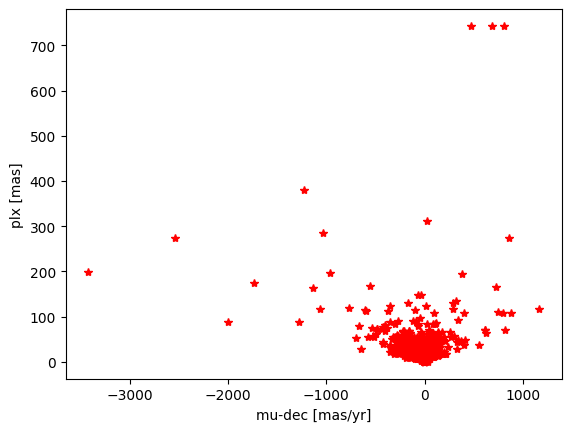

In [ ]:
import matplotlib.pyplot as plt

x=df1['mu-dec [mas/yr]']
y=df1['plx [mas]']

fig, ax = plt.subplots()

ax.plot(x,y,'r*')
ax.set_xlabel('mu-dec [mas/yr]')
ax.set_ylabel('plx [mas]')
